In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
import seaborn as sns


warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

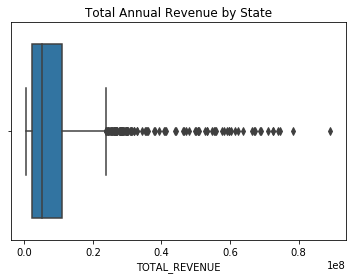

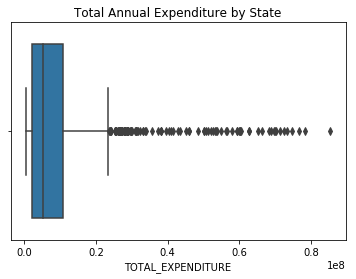

In [62]:
cleaned_rev = useducation_df["TOTAL_REVENUE"].dropna()
cleaned_expend = useducation_df["TOTAL_EXPENDITURE"].dropna()


sns.boxplot(x = cleaned_rev)
plt.title('Total Annual Revenue by State')
plt.show()

sns.boxplot(x = cleaned_expend)
plt.title('Total Annual Expenditure by State')
plt.show()



In [24]:
#z-score method
from scipy.stats import zscore

def find_z(values, name):
    print('outliers for ' + name)
    for threshold in range(3,5):
        print("The score threshold is: {}".format(threshold))
        print("The indices of the outliers:")
        print(np.where(values > threshold))
        print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('\n')

rev_z_scores = zscore(cleaned_rev)
expend_z_scores = zscore(cleaned_expend)

find_z(rev_z_scores, 'revenue')
find_z(expend_z_scores, 'expenditures')


outliers for revenue
The score threshold is: 3
The indices of the outliers:
(array([ 419,  471,  480,  523,  575,  626,  678,  729,  758,  782,  811,
        822,  834,  863,  874,  889,  918,  929,  941,  970,  981,  993,
       1021, 1032, 1044, 1072, 1083, 1095, 1123, 1134, 1146, 1174, 1185,
       1197, 1225, 1236, 1248, 1276]),)
Number of outliers is: 38
The score threshold is: 4
The indices of the outliers:
(array([ 480,  575,  626,  678,  729,  782,  834,  889,  941,  993, 1021,
       1044, 1072, 1095, 1123, 1146, 1174, 1197, 1225, 1248, 1276]),)
Number of outliers is: 21


outliers for expenditures
The score threshold is: 3
The indices of the outliers:
(array([ 419,  471,  480,  523,  575,  626,  678,  729,  758,  782,  811,
        822,  834,  863,  874,  889,  918,  929,  941,  970,  981,  993,
       1021, 1032, 1044, 1072, 1083, 1095, 1123, 1134, 1146, 1174, 1185,
       1197, 1225, 1236, 1248, 1276]),)
Number of outliers is: 38
The score threshold is: 4
The indices of the

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

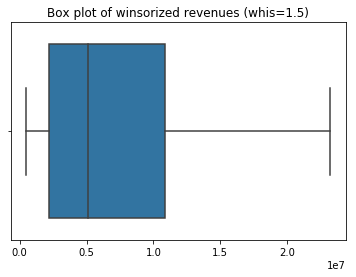

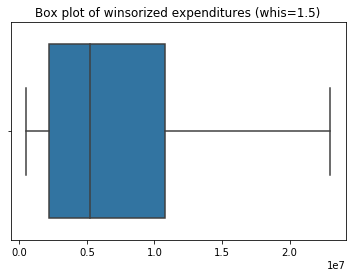

In [61]:
from scipy.stats.mstats import winsorize

#winsorize at 91st percentile 
winsorized_rev = winsorize(cleaned_rev, (0, 0.09))
winsorized_expend = winsorize(cleaned_expend, (0, 0.09))

sns.boxplot(x = winsorized_rev)
plt.title("Box plot of winsorized revenues (whis=1.5)")
plt.show()

sns.boxplot(x = winsorized_expend)
plt.title("Box plot of winsorized expenditures (whis=1.5)")
plt.show()


3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

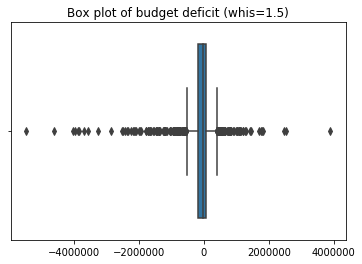

In [63]:
budget_deficit = cleaned_rev - cleaned_expend

sns.boxplot(budget_deficit)
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

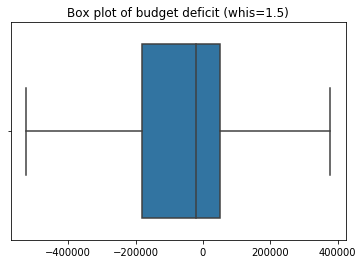

In [64]:
#winsorize budget deficit
winsorized_bd = winsorize(budget_deficit, (0.09, 0.07))
sns.boxplot(winsorized_bd)
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

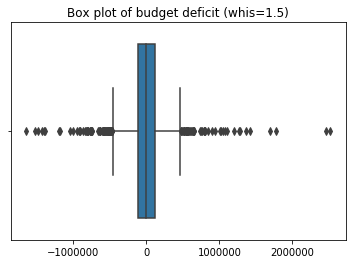

In [65]:
budget_deficit2 = winsorized_rev - winsorized_expend
sns.boxplot(budget_deficit2)
plt.title("Box plot of budget deficit (whis=1.5)")
plt.show()


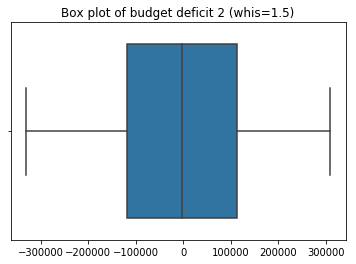

In [66]:
#winsorize budget deficit 2
winsorized_bd2 = winsorize(budget_deficit2, (0.09, 0.07))
sns.boxplot(winsorized_bd2)
plt.title("Box plot of budget deficit 2 (whis=1.5)")
plt.show()

In [60]:
def describe_vals(df, name):
    print(name)
    print("mean: " + str(df.mean()))
    print("median: " + str(np.ma.median(df)))
    print("std dev: " + str(df.std()))
    print("min: " + str(df.min()))
    print("max: " + str(df.max()))
    print('\n')
    
describe_vals(budget_deficit, "windsorized")
describe_vals(budget_deficit2, "double windsorized")


windsorized
mean: -104599.01015625
median: -21484.0
std dev: 573404.4779453841
min: -5487742.0
max: 3897129.0


double windsorized
mean: -8507.0875
median: -3311.0
std dev: 310398.9300452803
min: -1650831.0
max: 2520706.0




As expected, the second budget deficit calculation has a smaller range and standard deviation, since the data was effectivley winsorized twice. 